In [215]:
import requests
from bs4 import BeautifulSoup
import csv
import os

In [216]:
def main(page):
    organized_content=BeautifulSoup(page.content,'lxml')
    data=[]
    info_div=organized_content.find_all('div',{'class':'info'})
    for n in range(len(info_div)):
        get_title=info_div[n].find('h3',{'class':'name'}).text.strip()
        current_price=info_div[n].find('div',{'class':'prc'}).text.strip()
        old_price=info_div[n].find('div',{'class':'old'}).text.strip() if info_div[n].find('div',{'class':'old'}) else current_price
        reviews_number=info_div[n].find('div',{'class':'rev'}).text.strip() if info_div[n].find('div',{'class':'rev'}) else 0 
        data.append({'Title':get_title,'Current Price':current_price,'Original Price':old_price,'Reviews':reviews_number})
    if data:
        file_exists = os.path.isfile('Jumia_data.csv')
        with open('Jumia_data.csv','a',encoding='utf-8') as file:
            table = csv.DictWriter(file,data[0].keys())
            if not file_exists:
                table.writeheader()
            table.writerows(data)
    else:
        return False

In [217]:
n=1
while True:
    page = requests.get(f'https://www.jumia.com.eg/womens-active-clothing/?page={n}#catalog-listing')
    if main(page)==False:
        print('done')
        break
    main(page)
    print(f'Success {n}')
    n+=1

Success 1
Success 2
Success 3
Success 4
Success 5
Success 6
Success 7
Success 8
Success 9
Success 10
Success 11
Success 12
Success 13
Success 14
Success 15
Success 16
Success 17
Success 18
Success 19
Success 20
Success 21
Success 22
Success 23
Success 24
Success 25
Success 26
Success 27
Success 28
Success 29
Success 30
Success 31
Success 32
Success 33
Success 34
Success 35
Success 36
Success 37
Success 38
Success 39
Success 40
Success 41
Success 42
Success 43
Success 44
Success 45
Success 46
Success 47
Success 48
Success 49
done


In [218]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
df=pd.read_csv('Jumia_data.csv')
df.head()

,Title,Current Price,Original Price,Reviews
0,Nileton Hip Cover With Sleeves - BLack - For W...,EGP 245.00,EGP 480.00,4.6 out of 5(95)
1,Nileton Sportswear - Sport Leggings Pants With...,EGP 395.00,EGP 850.00,4.3 out of 5(51)
2,Nileton Sportswear - Sport Leggings Pants With...,EGP 375.00,EGP 750.00,4.6 out of 5(382)
3,Nileton Sportswear - Sport Leggings Pants With...,EGP 395.00,EGP 850.00,4.7 out of 5(36)
4,LC Waikiki V-Neck Plain Oversize Women's Knitw...,EGP 309.00,EGP 699.00,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           3916 non-null   object
 1   Current Price   3916 non-null   object
 2   Original Price  3916 non-null   object
 3   Reviews         3916 non-null   object
dtypes: object(4)
memory usage: 122.5+ KB


In [221]:
df.isnull().sum()

Title             0
Current Price     0
Original Price    0
Reviews           0
dtype: int64

In [222]:
df.duplicated().sum()

2595

In [223]:
df = df.drop_duplicates(keep='first')

In [224]:
df['Current Price']=df['Current Price'].apply(lambda x:
        sum([float(i.strip()) for i in x.replace('EGP', '').replace(',', '').split('-')]) / 2
        if '-' in x 
        else float(x.replace('EGP', '').replace(',', '').strip()))
df.dtypes

Title              object
Current Price     float64
Original Price     object
Reviews            object
dtype: object

In [225]:
df['Original Price']=df['Original Price'].apply(lambda x:
        sum([float(i.strip()) for i in x.replace('EGP', '').replace(',', '').split('-')]) / 2
        if '-' in x 
        else float(x.replace('EGP', '').replace(',', '').strip()))
df.dtypes

Title              object
Current Price     float64
Original Price    float64
Reviews            object
dtype: object

In [226]:
df['Discount (%)'] = (((df['Original Price'] - df['Current Price']) / df['Original Price']) * 100).round().astype(int)
df.head()

,Title,Current Price,Original Price,Reviews,Discount (%)
0,Nileton Hip Cover With Sleeves - BLack - For W...,245.0,480.0,4.6 out of 5(95),49
1,Nileton Sportswear - Sport Leggings Pants With...,395.0,850.0,4.3 out of 5(51),54
2,Nileton Sportswear - Sport Leggings Pants With...,375.0,750.0,4.6 out of 5(382),50
3,Nileton Sportswear - Sport Leggings Pants With...,395.0,850.0,4.7 out of 5(36),54
4,LC Waikiki V-Neck Plain Oversize Women's Knitw...,309.0,699.0,0,56


In [227]:
df['Rating']=df['Reviews'].apply(lambda x:
                                x.split('(')[0])
df['Reviews Number']=df['Reviews'].apply(lambda x:
                                x.split('(')[-1])

In [228]:
df.head()

,Title,Current Price,Original Price,Reviews,Discount (%),Rating,Reviews Number
0,Nileton Hip Cover With Sleeves - BLack - For W...,245.0,480.0,4.6 out of 5(95),49,4.6 out of 5,95)
1,Nileton Sportswear - Sport Leggings Pants With...,395.0,850.0,4.3 out of 5(51),54,4.3 out of 5,51)
2,Nileton Sportswear - Sport Leggings Pants With...,375.0,750.0,4.6 out of 5(382),50,4.6 out of 5,382)
3,Nileton Sportswear - Sport Leggings Pants With...,395.0,850.0,4.7 out of 5(36),54,4.7 out of 5,36)
4,LC Waikiki V-Neck Plain Oversize Women's Knitw...,309.0,699.0,0,56,0,0


In [229]:
df['Rating']=df['Rating'].apply(lambda x:
                               x.split(' ')[0]).astype(float)
df['Reviews Number']=df['Reviews Number'].apply(lambda x:
                                               x.replace(')','')).astype(int)
df.drop(columns='Reviews',inplace=True)
df.dtypes

Title              object
Current Price     float64
Original Price    float64
Discount (%)        int32
Rating            float64
Reviews Number      int32
dtype: object

In [230]:
df.head()

,Title,Current Price,Original Price,Discount (%),Rating,Reviews Number
0,Nileton Hip Cover With Sleeves - BLack - For W...,245.0,480.0,49,4.6,95
1,Nileton Sportswear - Sport Leggings Pants With...,395.0,850.0,54,4.3,51
2,Nileton Sportswear - Sport Leggings Pants With...,375.0,750.0,50,4.6,382
3,Nileton Sportswear - Sport Leggings Pants With...,395.0,850.0,54,4.7,36
4,LC Waikiki V-Neck Plain Oversize Women's Knitw...,309.0,699.0,56,0.0,0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 3877
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1321 non-null   object 
 1   Current Price   1321 non-null   float64
 2   Original Price  1321 non-null   float64
 3   Discount (%)    1321 non-null   int32  
 4   Rating          1321 non-null   float64
 5   Reviews Number  1321 non-null   int32  
dtypes: float64(3), int32(2), object(1)
memory usage: 61.9+ KB


In [232]:
df=df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1321 non-null   object 
 1   Current Price   1321 non-null   float64
 2   Original Price  1321 non-null   float64
 3   Discount (%)    1321 non-null   int32  
 4   Rating          1321 non-null   float64
 5   Reviews Number  1321 non-null   int32  
dtypes: float64(3), int32(2), object(1)
memory usage: 51.7+ KB


C:\Users\esraa\AppData\Local\Temp\ipykernel_12636\707256012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount (%)', y='Title', data=top_discounts, palette='coolwarm')


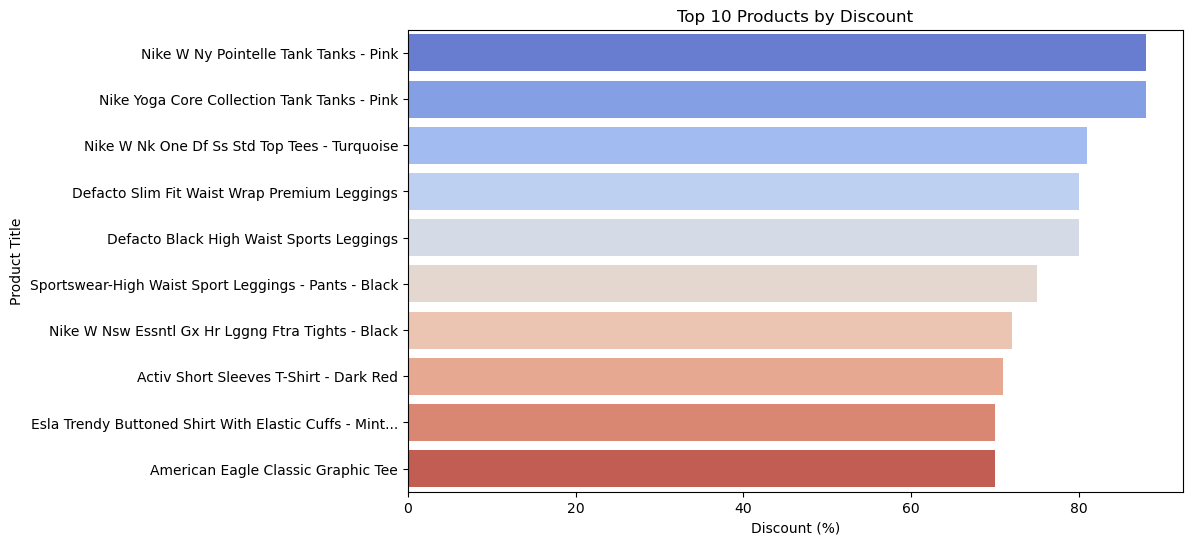

In [233]:
top_discounts = df.sort_values('Discount (%)', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Discount (%)', y='Title', data=top_discounts, palette='coolwarm')
plt.title('Top 10 Products by Discount')
plt.xlabel('Discount (%)')
plt.ylabel('Product Title')
plt.show()

.4 out of the top 10 products are from Nike.
This may indicate Nike is:
Pushing older inventory.
Using aggressive discounting to increase sales or compete.

.Product colors are feminine and trendy
Many items feature colors like Pink, Mint, and Turquoise.
This might reflect customer preferences or a marketing strategy to highlight eye-catching colors in discounts.

.Lesser-known brands also appear among the top discounted items
Brands like Esla, Defacto, and Sportswear are present.
Indicates they may be using discounts to boost visibility or compete with larger brands.

.Discount percentages are very close among top products
Most discounts are between 70%–90%.
This might indicate a site-wide sale or promotional campaign affecting multiple categories similarly.

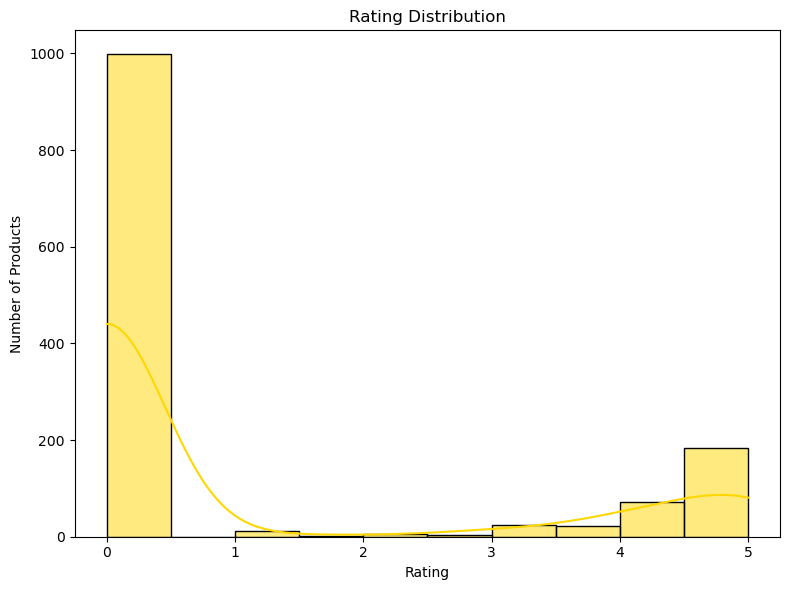

In [274]:
plt.figure(figsize=(8,6))
sns.histplot(df['Rating'], bins=10, kde=True, color='gold')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

With considered that zero not good in analysis 
most ratings are positive and between 4-5 that brief that people are satisfied about products

C:\Users\esraa\AppData\Local\Temp\ipykernel_12636\2138160290.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Original Price', y='Discount (%)', palette='viridis')


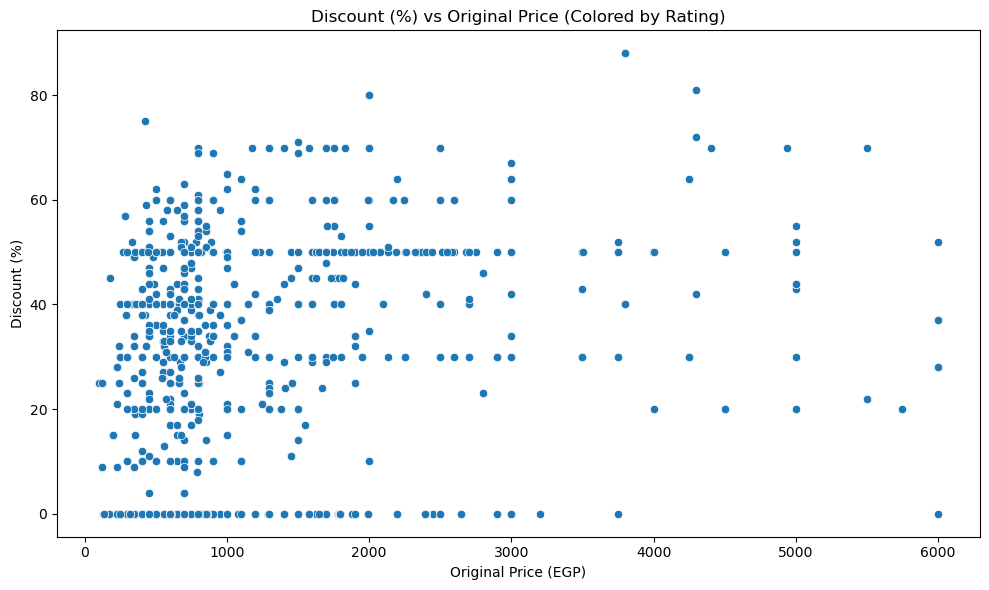

In [235]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Original Price', y='Discount (%)', palette='viridis')
plt.title('Discount (%) vs Original Price (Colored by Rating)')
plt.xlabel('Original Price (EGP)')
plt.ylabel('Discount (%)')
plt.tight_layout()
plt.show()

it shows that most of products that have discounts are less than 2000 EGP 
this brief that expensive products are specialed to special category of people the propability of it to have discount is little

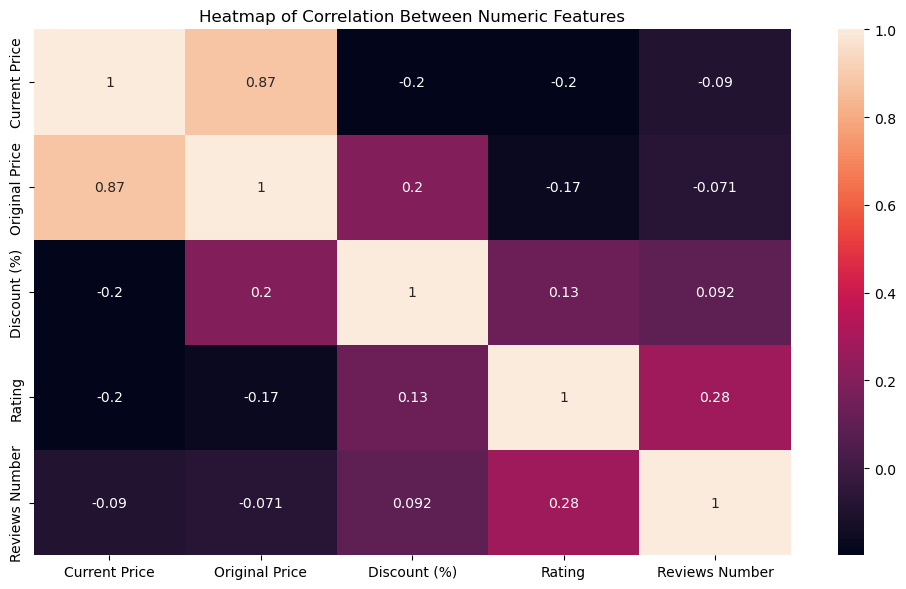

In [237]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True)
plt.title('Heatmap of Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

The current price of these athletic wear products is heavily influenced by their original price. However, other factors like the discount offered, the product rating, and the number of reviews don't show strong linear correlations with the price or with each other